#### Lead Scoring Case Study

#### Core Objective:
- An education company named X Education sells online courses to industry professionals through their website
- People land on the website and either browse the courses or fill up a form for the course or watch some videos
- When these people fill up a form providing their email address or phone number, they are classified to be a lead
- Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%
- Require to build a model that assigns a lead score to each of the leads such that the customers with 
  higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance

#### Dataset:
- Dataset of leads from the past with around 9000 data points with the target variable column as ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

#### Goal:
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads 
  which can be used by the company to target potential leads. 
  A higher score would mean the lead is most likely to convert whereas a lower score would mean that the lead mostly not get converted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Leads.csv", header=0)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Inference:
- There are 9240 rows and 37 columns in the given dataset with few columns having nulls 

In [4]:
round((data.isnull().sum().sort_values(ascending=False)/len(data)) * 100, 2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [5]:
print(f'No. of columns with null values {len(data.columns[data.isnull().any()])}')
data.columns[data.isnull().any()]

No. of columns with null values 17


Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

#### Inference:
- There are 17 columns in the given dataset with null values 

In [6]:
data[data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### Inference:
- There are no exact duplicates in the given dataset

In [7]:
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
sum(data.duplicated(subset = 'Lead Number')) == 0

True

#### Inference:
- There are no duplicates for the columns Prospect ID and Lead Number

In [9]:
data.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000


#### Inference:
- There are outliers being observed clearly in few columns, however, will cleanse the data at later stage after certain transformations

#### Data Cleansing and Transformation

#### Dropping columns with null values > 45%

In [10]:
(data.isnull().sum().sort_values(ascending=False)/data.shape[0])*100 > 45

Lead Quality                                      True
Asymmetrique Profile Score                        True
Asymmetrique Activity Score                       True
Asymmetrique Profile Index                        True
Asymmetrique Activity Index                       True
Tags                                             False
What matters most to you in choosing a course    False
Lead Profile                                     False
What is your current occupation                  False
Country                                          False
How did you hear about X Education               False
Specialization                                   False
City                                             False
TotalVisits                                      False
Page Views Per Visit                             False
Last Activity                                    False
Lead Source                                      False
Do Not Email                                     False
Do Not Cal

In [11]:
cols = ['Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index']

data.drop(columns=cols, axis=1, inplace=True)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


#### Analyzing individual columns having null values > 10% and taking respective action based on data

In [12]:
(data.isnull().sum().sort_values(ascending=False)/data.shape[0])*100

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Lead Number                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.0000

In [13]:
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [14]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

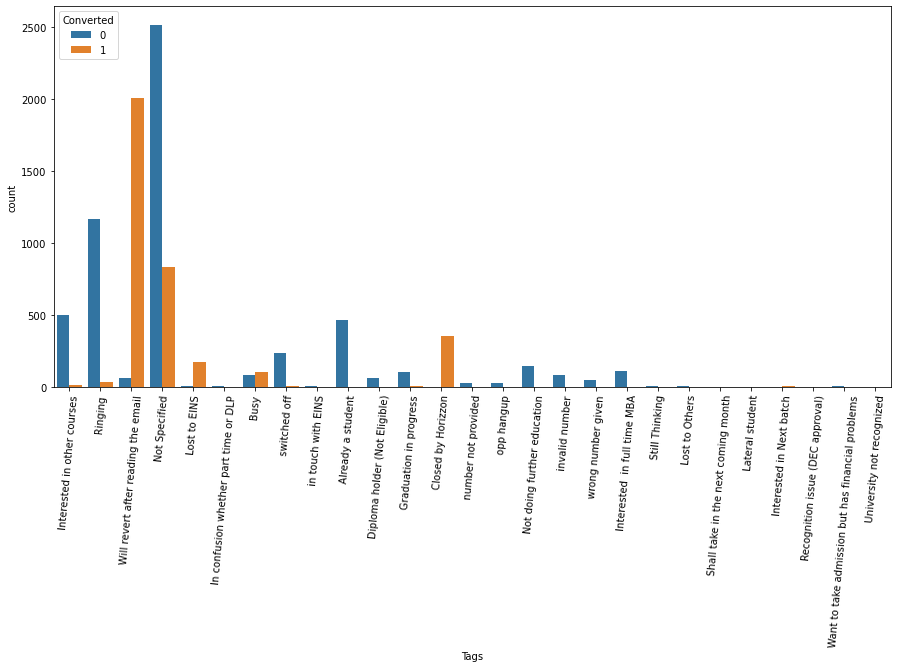

In [15]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data.Tags, hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [16]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['Approached upfront','Graduation in progress','number not provided',
                                     'In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                    'opp hangup','Still Thinking', 'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

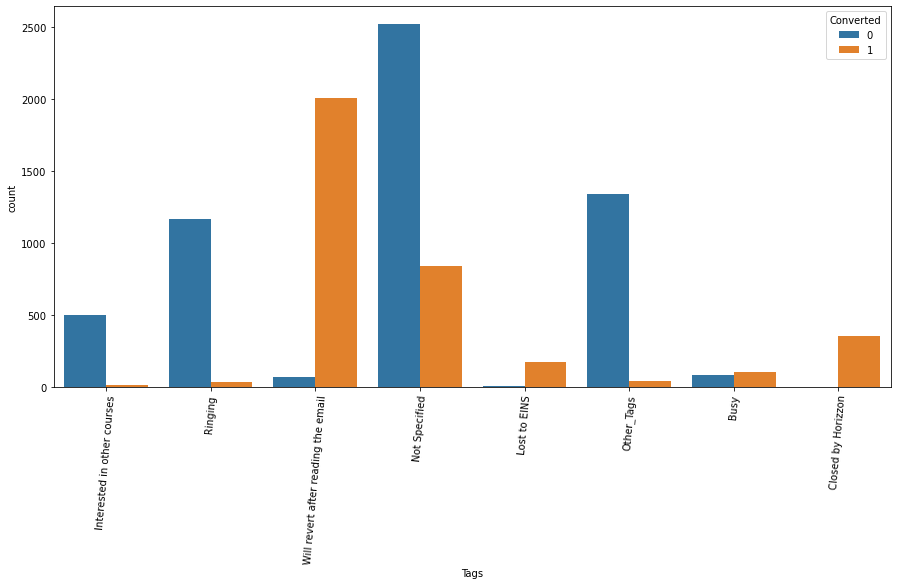

In [17]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data.Tags, hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [18]:
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
cols_to_drop = ['What matters most to you in choosing a course']

#### Inference:
    - As we can see, majority of the data belong to the value 'Better Career Prospects', hence dropping the column as there would be no intution coming around

In [20]:
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

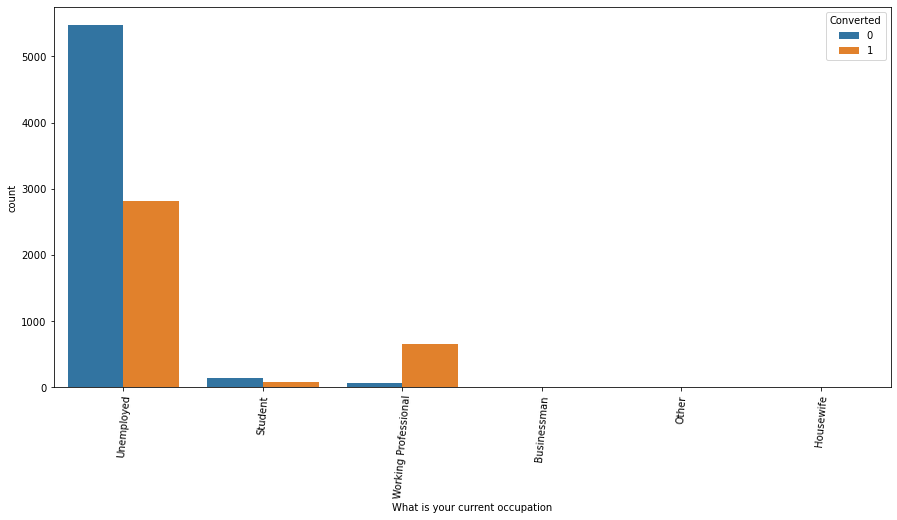

In [22]:
#plotting spread of What is your current occupation columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['What is your current occupation'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

#### Inference:
    - Working Professionals going for the course have high chances of joining it
    - Unemployed leads are the most in terms of Absolute numbers

In [23]:
data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
South Africa               4
Canada                     4
Nigeria                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Italy                      2
Philippines                2
Bangladesh                 2
Ghana                      2
Belgium                    2
China                      2
Kenya                      1
Vietnam                    1
Denmark                    1
Switzerland                1
Indonesia                  1
Liberia       

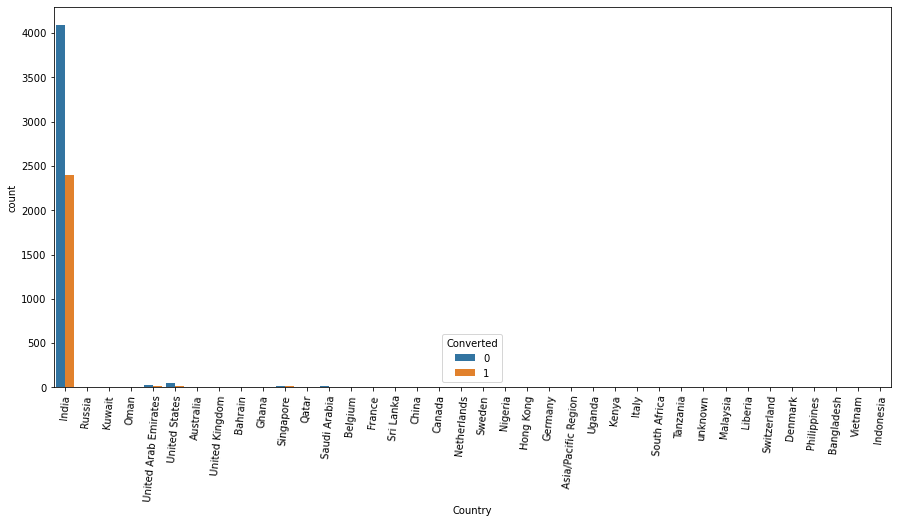

In [24]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data.Country, hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [25]:
cols_to_drop.append('Country')

#### Inference:
    - As we can see, majority of the data belong to the country 'India', hence dropping the column as there would be no intution coming around

In [26]:
data['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [27]:
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace('Select', 'Other').replace(np.nan, 'Other')

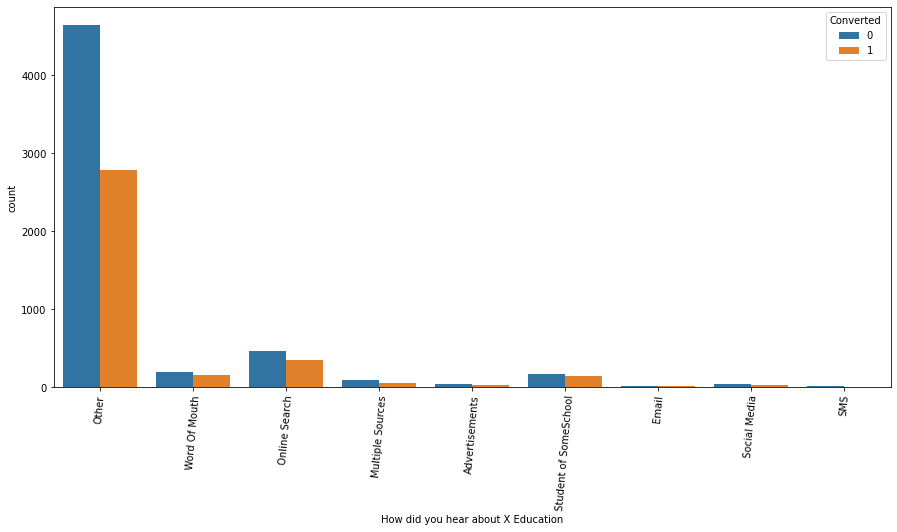

In [28]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['How did you hear about X Education'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [29]:
data['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
data['Specialization'] = data['Specialization'].replace('Select', 'Not Specified').replace(np.nan, 'Not Specified')

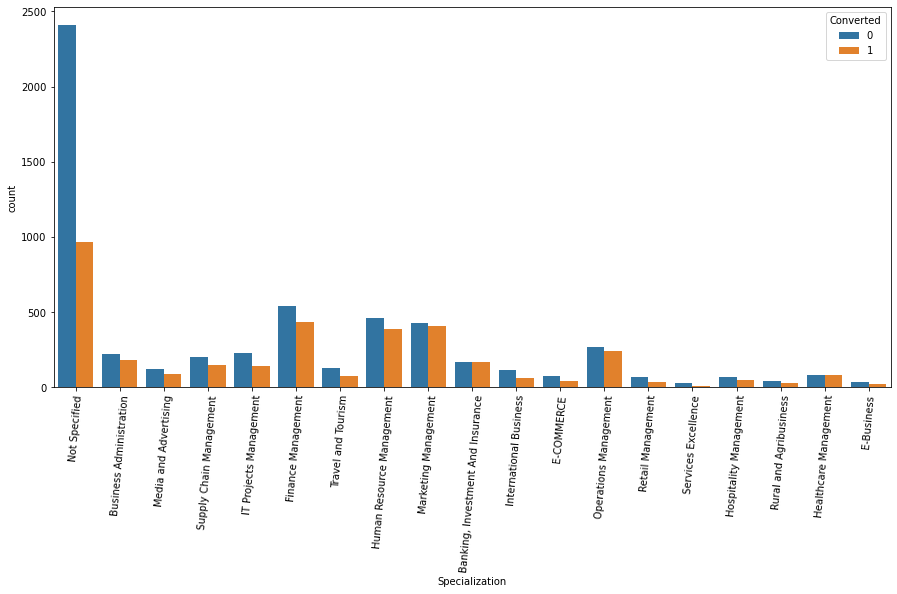

In [31]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Specialization'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

#### Inference:
-  Specialization with Management in them have higher number of leads as well as leads converted. So this could be a significant variable and should not be dropped.

In [32]:
#combining Management Specializations because they show similar trends
data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

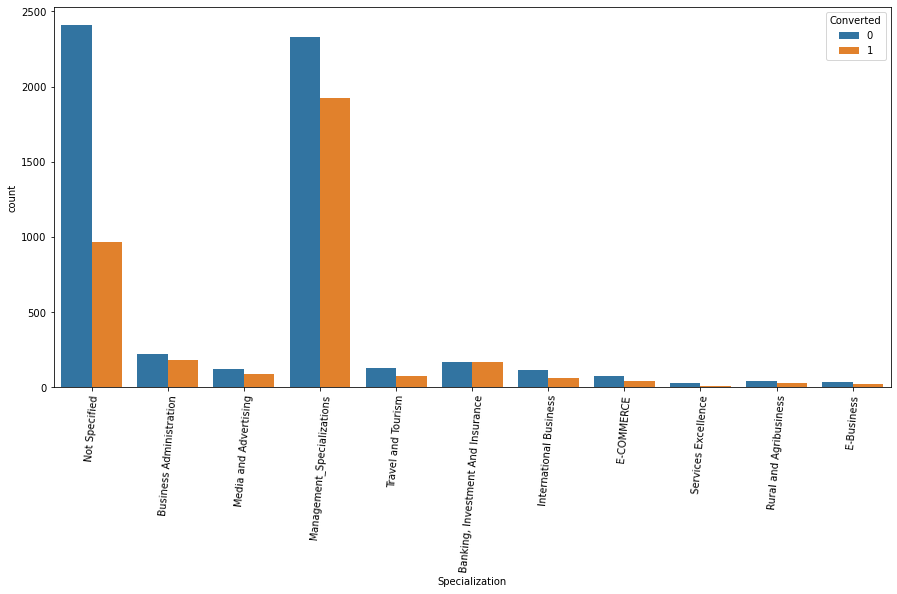

In [33]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Specialization'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [34]:
data['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
data['City'] = data['City'].replace('Select', data['City'].mode()[0]).replace(np.nan, data['City'].mode()[0])

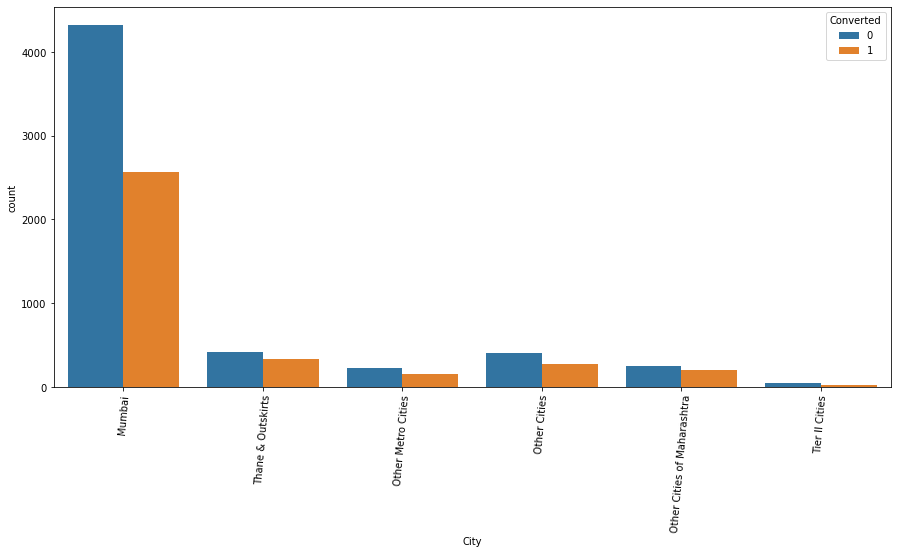

In [36]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['City'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [37]:
data['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
data['Lead Profile'] = data['Lead Profile'].replace(np.nan, 'Other Leads').replace('Select', 'Other Leads')

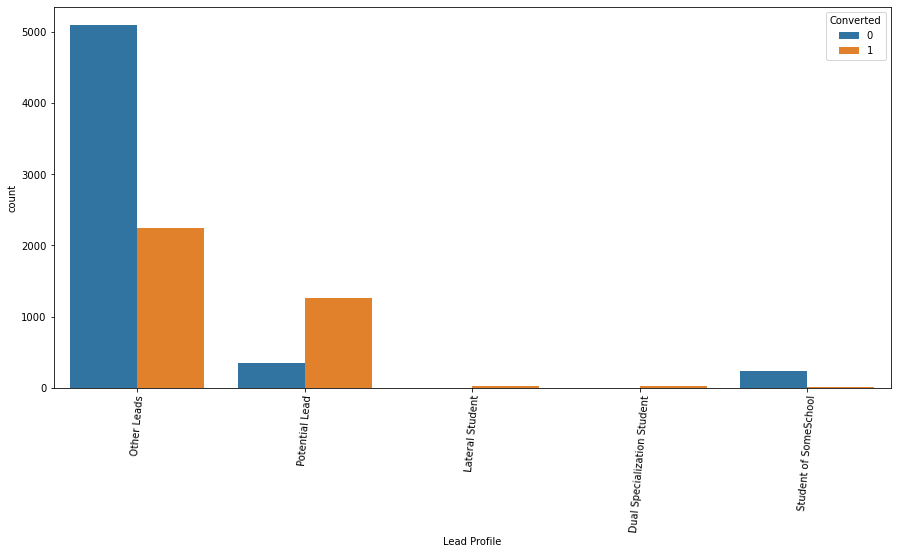

In [39]:
#plotting spread of Tags columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Lead Profile'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [40]:
data['TotalVisits'].isnull().sum()

137

#### Inference:
- Deleting 137 null records from the dataframe

In [41]:
data = data[~data['TotalVisits'].isnull()]

In [42]:
data['Lead Source'].isnull().sum()

29

#### Inference:
- Deleting 29 null records from the dataframe

In [43]:
data = data[~data['Lead Source'].isnull()]

In [44]:
data.drop(columns=cols_to_drop, axis=1, inplace=True)

In [45]:
data.shape

(9074, 30)

In [46]:
data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [47]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
testone                 1
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [49]:
#replacing Nan Values and combining low frequency values
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

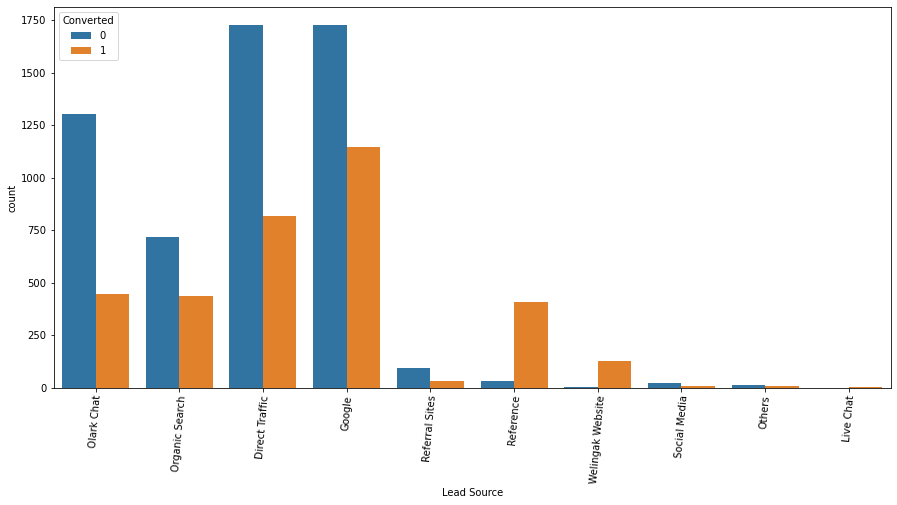

In [50]:
#plotting spread of Lead Source columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Lead Source'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

#### Inference:
    - Maximum number of leads are generated by Google and Direct traffic
    - Conversion Rate of reference leads and leads through welingak website is high

In [51]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [52]:
#replacing Nan Values and combining low frequency values

data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

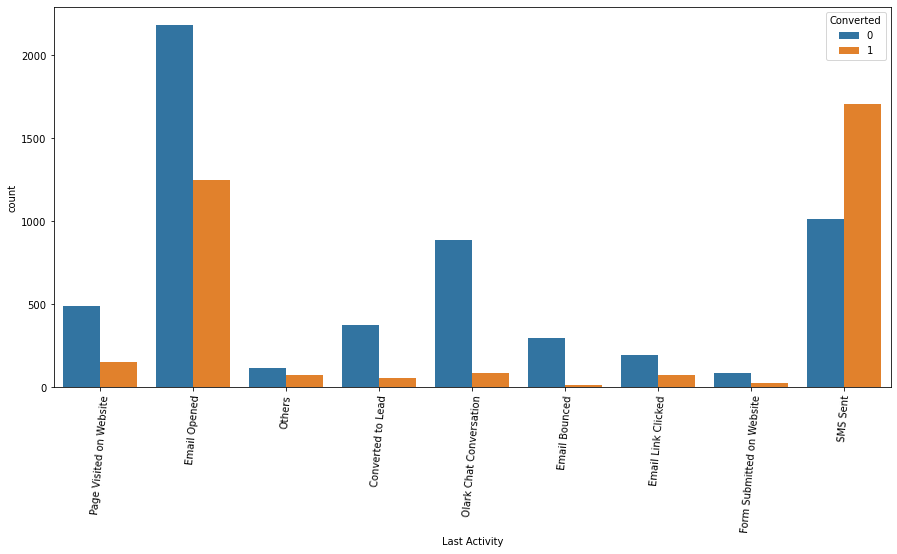

In [53]:
#plotting spread of Last Activity columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Last Activity'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

#### Inference:
    - Customers with last activity as SMS Sent showcased higher lead conversion rate

In [54]:
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

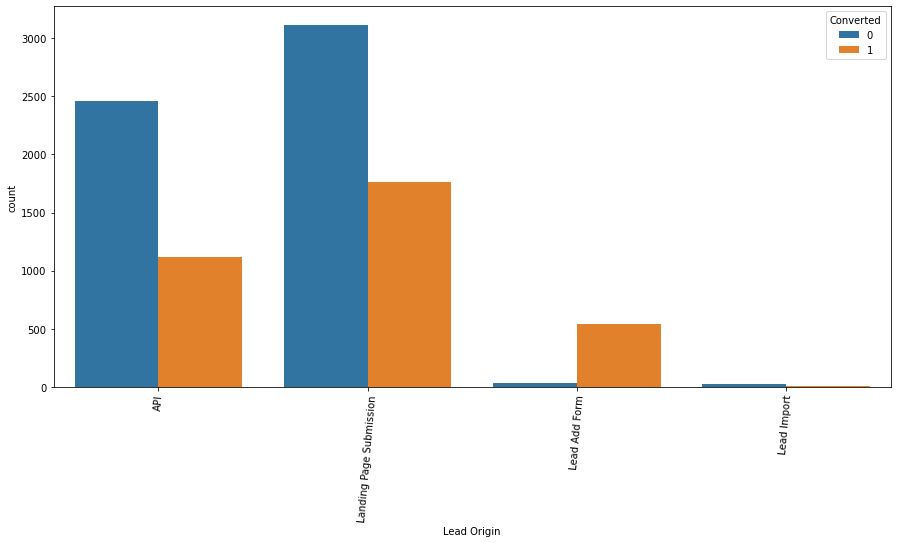

In [55]:
#plotting spread of Last Activity columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Lead Origin'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

#### Inference:
    - API and Landing Page Submission bring higher number of leads as well as conversion.
    - Lead Add Form has a very high conversion rate but count of leads are not very high.
    - Lead Import got very few leads.
    - In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

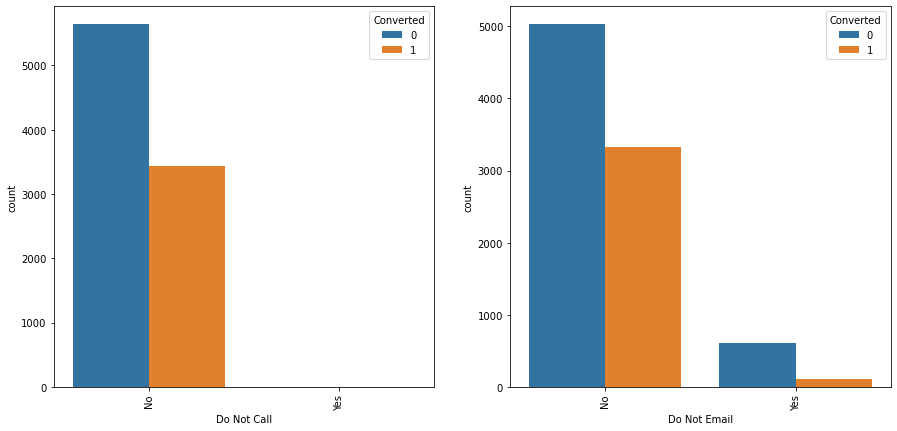

In [56]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,7))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data['Do Not Call'], hue=data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data['Do Not Email'], hue=data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [57]:
data['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [58]:
data['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

#### Inference:
    - Since 99% of the data belong to the same value of Do not Call column, dropping the same

In [59]:
data.drop(columns='Do Not Call', axis=1, inplace=True)

In [60]:
data.shape

(9074, 29)

In [61]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [62]:
data['Search'].value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [63]:
data['Magazine'].value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

In [64]:
data['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [65]:
data['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [66]:
data['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [67]:
data['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [68]:
data['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [70]:
data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [71]:
data['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [72]:
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

#### Inference:
    - All above columns have 99% of the data with same values, hence dropping

In [73]:
cols_to_drop2 = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [74]:
data.drop(columns=cols_to_drop2, axis=1, inplace=True)

In [75]:
data.shape

(9074, 18)

In [76]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [77]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

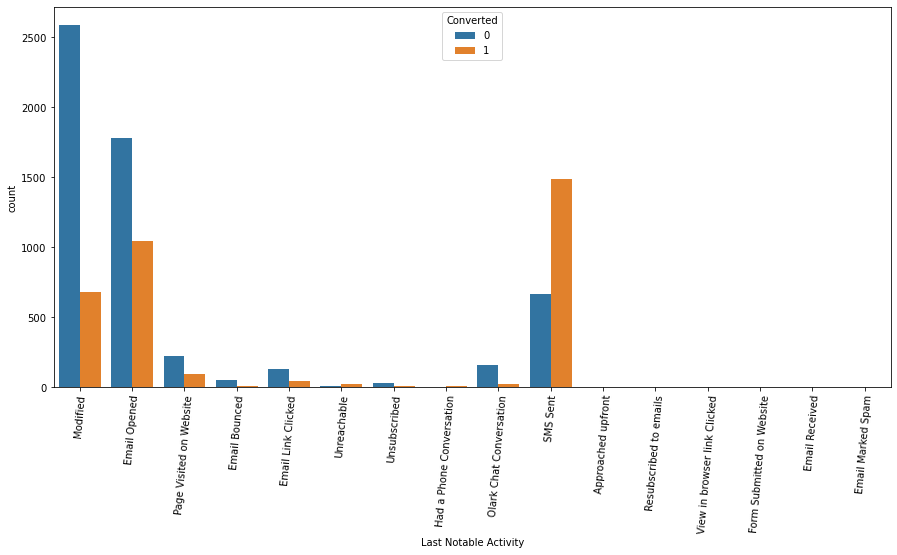

In [78]:
#plotting spread of Last Activity columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Last Notable Activity'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [79]:
#replacing lower frequency values
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

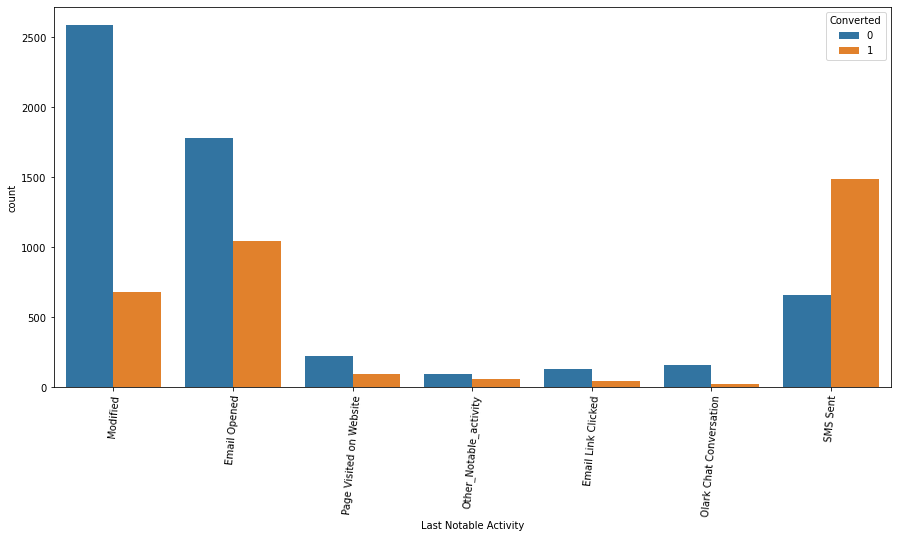

In [80]:
#plotting spread of Last Activity columnn
plt.figure(figsize=(15,7))
plt1 = sns.countplot(data['Last Notable Activity'], hue=data.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=85)
plt.show()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

#### Target Measure Imbalance

In [82]:
tgt_imbalance = (sum(data['Converted'])/len(data['Converted']))*100
tgt_imbalance

37.85541106458012

In [83]:
data.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.022830,0.022094,0.018360,0.058703
Converted,0.022830,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.022094,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.018360,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.058703,0.000260,0.511068,0.318350,1.000000


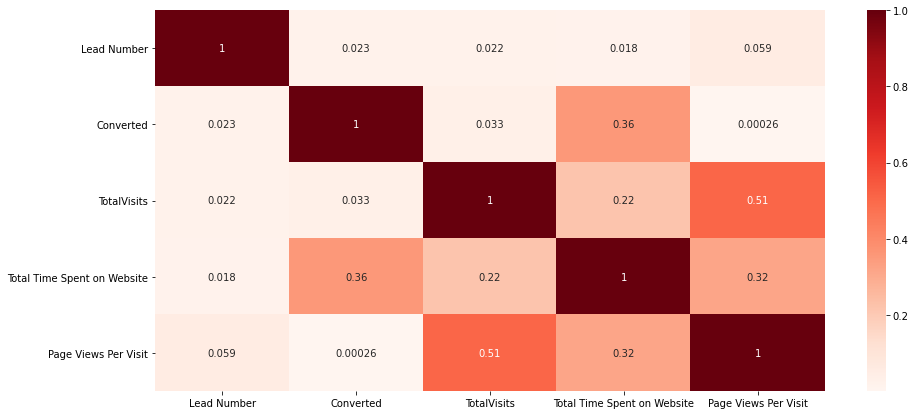

In [84]:
#Checking correlations of numeric values

# figure size
plt.figure(figsize=(15,7))

# heatmap
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

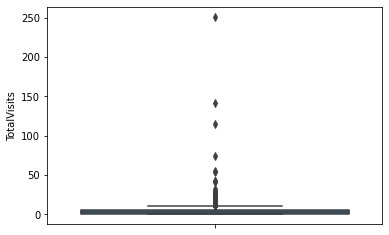

In [85]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [86]:
#checking percentile values for "Total Visits"

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Inference:
    - Removing top 1% of the column outlier values

In [87]:
data[data['TotalVisits'] <= 17]['TotalVisits'].describe(percentiles=[0.05, .25, .5, .75, .90, .95, .99])

count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        14.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [88]:
data = data[data['TotalVisits'] <= 17]
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Other,Unemployed,Interested in other courses,Other Leads,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Other,Unemployed,Ringing,Other Leads,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Other,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Other Leads,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Other,Unemployed,Will revert after reading the email,Other Leads,Mumbai,No,Modified


In [89]:
data.shape

(8991, 18)

In [90]:
#checking percentiles for "Total Time Spent on Website"

data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

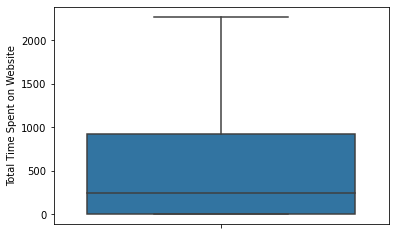

In [91]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

#### Inferene:
    - There are no outliers observed for the variable

In [92]:
#checking spread of "Page Views Per Visit"

data['Page Views Per Visit'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

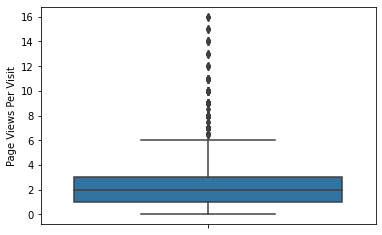

In [93]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

#### Inference:
    - Removing top 1% of the column outlier values

In [94]:
data = data[data['Page Views Per Visit'] <= 9]

#### Final Dataframe shape and Statistics

In [95]:
data.shape

(8924, 18)

In [96]:
data.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8924.000000,8924.000000,8924.000000,8924.000000,8924.00000
mean,617039.166853,0.377521,3.153070,479.287875,2.27400
std,23333.176791,0.484794,2.903138,544.381711,1.89403
min,579533.000000,0.000000,0.000000,0.000000,0.00000
25%,596416.750000,0.000000,1.000000,7.000000,1.00000
50%,615405.500000,0.000000,3.000000,242.000000,2.00000
75%,637156.750000,1.000000,5.000000,914.000000,3.00000
90%,650235.900000,1.000000,7.000000,1371.000000,5.00000
99%,659560.390000,1.000000,13.000000,1838.540000,8.00000
max,660737.000000,1.000000,17.000000,2272.000000,9.00000


#### Dummy Variable Creation

In [97]:
categorical_cols = list(data.select_dtypes(include=['object']).columns)
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [98]:
categorical_cols.append('Lead Number')
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Lead Number']

In [99]:
data[['A free copy of Mastering The Interview','Do Not Email']].value_counts()

A free copy of Mastering The Interview  Do Not Email
No                                      No              5716
Yes                                     No              2519
No                                      Yes              410
Yes                                     Yes              279
dtype: int64

In [100]:
# Defining the map function
def map_func(x):
    return x.map({'Yes': 1, "No": 0})

data[['A free copy of Mastering The Interview','Do Not Email']] = data[['A free copy of Mastering The Interview','Do Not Email']]\
                                                                    .apply(map_func)
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Other,Unemployed,Interested in other courses,Other Leads,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Other,Unemployed,Ringing,Other Leads,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Other,Student,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Other Leads,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Other,Unemployed,Will revert after reading the email,Other Leads,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Other,Unemployed,Will revert after reading the email,Potential Lead,Mumbai,0,Other_Notable_activity
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Other,Unemployed,Other_Tags,Potential Lead,Mumbai,1,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Other,Unemployed,Other_Tags,Potential Lead,Mumbai,1,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Online Search,Unemployed,Not Specified,Other Leads,Other Metro Cities,0,SMS Sent


In [101]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

In [102]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [104]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [105]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

In [106]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [107]:
#dropping the original columns after dummy variable creation

data.drop(categorical_cols, axis=1, inplace = True)
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
data.shape

(8924, 57)

#### Check if all the columns are of numeric or not

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8924 non-null   int64  
 1   TotalVisits                                           8924 non-null   float64
 2   Total Time Spent on Website                           8924 non-null   int64  
 3   Page Views Per Visit                                  8924 non-null   float64
 4   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 6   Lead Origin_Lead Import                               8924 non-null   uint8  
 7   What is your current occupation_Housewife             8924 non-null   uint8  
 8   What is your current occupation_Other                 8924

#### Correlated Variables check

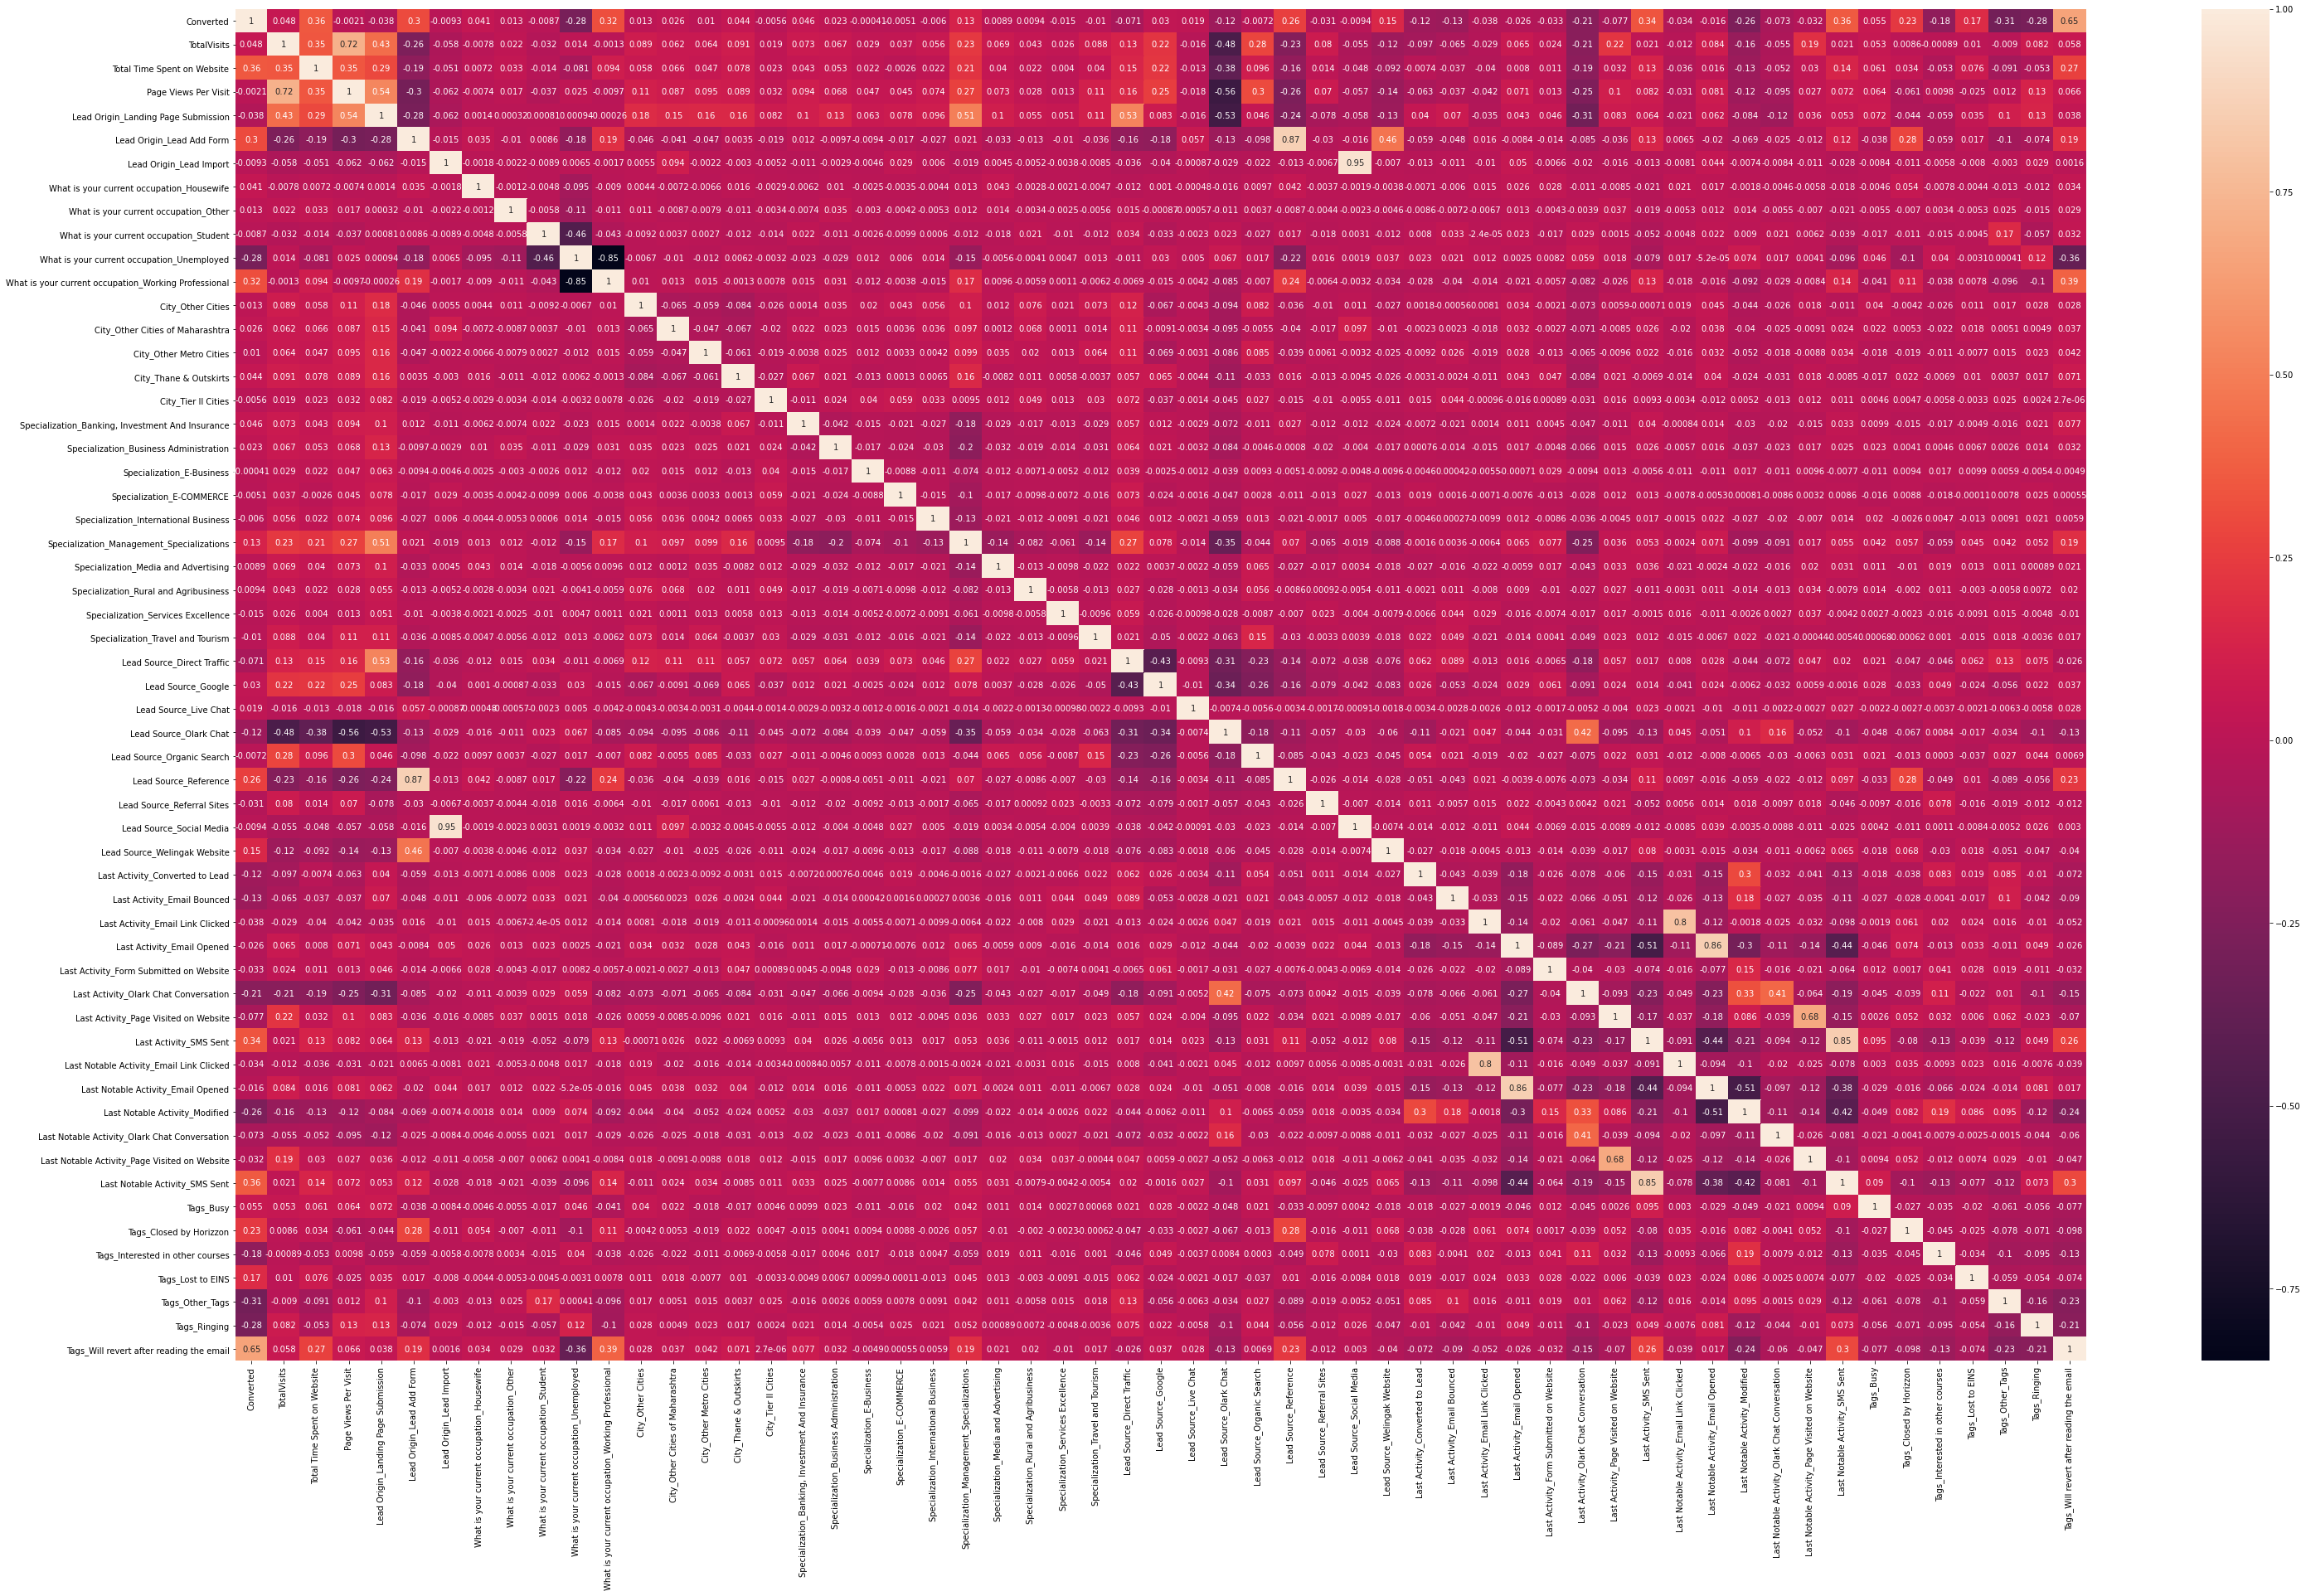

In [110]:
# correlation matrix 
plt.figure(figsize = (50,30))
sns.heatmap(data.corr(),annot = True)
plt.show()

#### Deleting the highy correlated variables

In [111]:
highly_corr_cols = ['What is your current occupation_Unemployed', 'Last Notable Activity_Modified',\
                    'Lead Source_Direct Traffic', 'Last Activity_Email Opened', 'Lead Source_Olark Chat']

In [112]:
data.drop(highly_corr_cols, axis=1, inplace=True)
data.shape

(8924, 52)

#### Split the data to train test

In [113]:
y = data.pop('Converted')
X = data

In [114]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [115]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

#### scaling the data

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3052,-1.081966,-0.872544,-1.200670,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8271,-0.392484,-0.640413,-0.671032,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2780,-1.081966,-0.872544,-1.200670,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5683,-0.392484,1.483766,-0.141394,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2764,-1.081966,-0.872544,-1.200670,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### Feature Selection Using RFE

In [118]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('What is your current occupation_Housewife', False, 7),
 ('What is your current occupation_Other', False, 14),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 26),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 30),
 ('City_Tier II Cities', False, 6),
 ('Specialization_Banking, Investment And Insurance', False, 10),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', False, 11),
 ('Specialization_International Business', False, 16),
 ('Specialization_Management_Specializations', False, 1

In [120]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### Model Building

#### Model-1

In [121]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1217.4
Date:                Wed, 09 Aug 2023   Deviance:                       2434.8
Time:                        20:56:17   Pearson chi2:                 9.54e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7729      0.153    -11.556      0.000      -2.074      -1.472
Total Time Spent on Website                              0.9317      0.056     16.755      0.000       0.823       1.041
Lead Origin_Landing Page Submission                     -1.1019      0.121     -9.093      0.000      -1.339      -0.864
Lead Origin_Lead Add Form                                2.5850      2.922      0.885      0.376      -3.142       8.312
What is your current occupation_Working Professional     1.1511      0.434      2.654      0.008       0.301       2.001
Specialization_Travel and Tourism                       -0.9125      0.418     -2.186      0.029      -1.731      -0.094
Lead Source_Reference                                   -1.9492      2.955     -0.660      0.510      -7.742       3.843
Lead Source_Welingak Website                             2.0491      3.015      0.680      0.497      -3.860       7.958
Last Activity_Converted to Lead                         -0.7969      0.370     -2.151      0.031      -1.523      -0.071
Last Activity_Email Bounced                             -1.2214      0.519     -2.351      0.019      -2.240      -0.203
Last Activity_Olark Chat Conversation                   -0.6600      0.254     -2.602      0.009      -1.157      -0.163
Last Activity_SMS Sent                                   1.0518      0.228      4.609      0.000       0.605       1.499
Last Notable Activity_Email Opened                       1.0525      0.165      6.393      0.000       0.730       1.375
Last Notable Activity_SMS Sent                           2.0868      0.210      9.941      0.000       1.675       2.498
Tags_Busy                                                0.7699      0.236      3.267      0.001       0.308       1.232
Tags_Closed by Horizzon                                  6.2202      0.739      8.417      0.000       4.772       7.669
Tags_Interested in other courses                        -2.1075      0.395     -5.342      0.000      -2.881      -1.334
Tags_Lost to EINS                                        5.8289      0.610      9.548      0.000       4.632       7.025
Tags_Other_Tags                                         -2.7180      0.241    -11.289      0.000      -3.190      -2.246
Tags_Ringing                                            -3.4722      0.251    -13.826      0.000      -3.964      -2.980
Tags_Will revert after reading the email                 4.3943      0.195     22.480      0.000       4.011       4.777
========================================================================================================================
"""

#### Since P value of 'Lead Source_Reference' is high, we can drop this column

In [122]:
# Dropping the column 'Lead Source_Reference'
col1 = cols.drop('Lead Source_Reference')

#### Model-2

In [123]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1217.7
Date:                Wed, 09 Aug 2023   Deviance:                       2435.3
Time:                        20:56:18   Pearson chi2:                 9.57e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7721      0.153    -11.551      0.000      -2.073      -1.471
Total Time Spent on Website                              0.9328      0.056     16.789      0.000       0.824       1.042
Lead Origin_Landing Page Submission                     -1.1018      0.121     -9.093      0.000      -1.339      -0.864
Lead Origin_Lead Add Form                                0.7027      0.452      1.556      0.120      -0.183       1.588
What is your current occupation_Working Professional     1.1478      0.433      2.648      0.008       0.298       1.997
Specialization_Travel and Tourism                       -0.9123      0.417     -2.186      0.029      -1.730      -0.094
Lead Source_Welingak Website                             3.9319      0.869      4.527      0.000       2.229       5.634
Last Activity_Converted to Lead                         -0.7971      0.370     -2.152      0.031      -1.523      -0.071
Last Activity_Email Bounced                             -1.2215      0.519     -2.353      0.019      -2.239      -0.204
Last Activity_Olark Chat Conversation                   -0.6600      0.254     -2.602      0.009      -1.157      -0.163
Last Activity_SMS Sent                                   1.0501      0.228      4.600      0.000       0.603       1.497
Last Notable Activity_Email Opened                       1.0530      0.165      6.396      0.000       0.730       1.376
Last Notable Activity_SMS Sent                           2.0871      0.210      9.938      0.000       1.675       2.499
Tags_Busy                                                0.7695      0.236      3.265      0.001       0.308       1.231
Tags_Closed by Horizzon                                  6.2011      0.738      8.405      0.000       4.755       7.647
Tags_Interested in other courses                        -2.1090      0.395     -5.346      0.000      -2.882      -1.336
Tags_Lost to EINS                                        5.8270      0.611      9.544      0.000       4.630       7.024
Tags_Other_Tags                                         -2.7173      0.241    -11.288      0.000      -3.189      -2.246
Tags_Ringing                                            -3.4755      0.251    -13.838      0.000      -3.968      -2.983
Tags_Will revert after reading the email                 4.3911      0.195     22.489      0.000       4.008       4.774
========================================================================================================================
"""

#### Since P value of 'Lead Origin_Lead Add Form' is high, we can drop this column

In [124]:
# Dropping the column 'Lead Origin_Lead Add Form'
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model-3

In [125]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1218.9
Date:                Wed, 09 Aug 2023   Deviance:                       2437.9
Time:                        20:56:18   Pearson chi2:                 9.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7597      0.153    -11.490      0.000      -2.060      -1.460
Total Time Spent on Website                              0.9279      0.056     16.692      0.000       0.819       1.037
Lead Origin_Landing Page Submission                     -1.1338      0.120     -9.471      0.000      -1.368      -0.899
What is your current occupation_Working Professional     1.1700      0.435      2.689      0.007       0.317       2.023
Specialization_Travel and Tourism                       -0.9264      0.421     -2.202      0.028      -1.751      -0.102
Lead Source_Welingak Website                             4.6137      0.750      6.152      0.000       3.144       6.083
Last Activity_Converted to Lead                         -0.8156      0.373     -2.189      0.029      -1.546      -0.085
Last Activity_Email Bounced                             -1.2338      0.524     -2.354      0.019      -2.261      -0.207
Last Activity_Olark Chat Conversation                   -0.6805      0.254     -2.676      0.007      -1.179      -0.182
Last Activity_SMS Sent                                   1.0644      0.227      4.681      0.000       0.619       1.510
Last Notable Activity_Email Opened                       1.0577      0.165      6.426      0.000       0.735       1.380
Last Notable Activity_SMS Sent                           2.0840      0.209      9.959      0.000       1.674       2.494
Tags_Busy                                                0.7752      0.236      3.287      0.001       0.313       1.237
Tags_Closed by Horizzon                                  6.4504      0.725      8.891      0.000       5.029       7.872
Tags_Interested in other courses                        -2.1080      0.395     -5.339      0.000      -2.882      -1.334
Tags_Lost to EINS                                        5.8606      0.610      9.607      0.000       4.665       7.056
Tags_Other_Tags                                         -2.7042      0.241    -11.242      0.000      -3.176      -2.233
Tags_Ringing                                            -3.4518      0.251    -13.775      0.000      -3.943      -2.961
Tags_Will revert after reading the email                 4.4626      0.191     23.381      0.000       4.088       4.837
========================================================================================================================
"""

#### Checking for VIF values

In [126]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,5.24
10,Last Notable Activity_SMS Sent,4.88
1,Lead Origin_Landing Page Submission,2.31
17,Tags_Will revert after reading the email,1.97
9,Last Notable Activity_Email Opened,1.63
16,Tags_Ringing,1.39
15,Tags_Other_Tags,1.37
2,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.19
5,Last Activity_Converted to Lead,1.12


#### Dropping the column Last Activity_SMS Sent as it has low P value and High VIF

In [127]:
# Dropping the column 'Last Activity_SMS Sent'
col1 = col1.drop('Last Activity_SMS Sent')

#### Model-4

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1229.7
Date:                Wed, 09 Aug 2023   Deviance:                       2459.4
Time:                        20:56:18   Pearson chi2:                 9.40e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4082      0.125    -11.290      0.000      -1.653      -1.164
Total Time Spent on Website                              0.9264      0.055     16.747      0.000       0.818       1.035
Lead Origin_Landing Page Submission                     -1.1114      0.119     -9.337      0.000      -1.345      -0.878
What is your current occupation_Working Professional     1.1765      0.429      2.743      0.006       0.336       2.017
Specialization_Travel and Tourism                       -0.9216      0.428     -2.155      0.031      -1.760      -0.083
Lead Source_Welingak Website                             4.7051      0.747      6.296      0.000       3.240       6.170
Last Activity_Converted to Lead                         -1.1520      0.362     -3.186      0.001      -1.861      -0.443
Last Activity_Email Bounced                             -1.5816      0.514     -3.077      0.002      -2.589      -0.574
Last Activity_Olark Chat Conversation                   -1.0222      0.239     -4.285      0.000      -1.490      -0.555
Last Notable Activity_Email Opened                       0.7044      0.139      5.052      0.000       0.431       0.978
Last Notable Activity_SMS Sent                           2.7842      0.157     17.749      0.000       2.477       3.092
Tags_Busy                                                0.8134      0.235      3.460      0.001       0.353       1.274
Tags_Closed by Horizzon                                  6.2618      0.723      8.665      0.000       4.845       7.678
Tags_Interested in other courses                        -2.1959      0.393     -5.593      0.000      -2.965      -1.426
Tags_Lost to EINS                                        5.7712      0.609      9.479      0.000       4.578       6.965
Tags_Other_Tags                                         -2.7200      0.240    -11.348      0.000      -3.190      -2.250
Tags_Ringing                                            -3.4485      0.251    -13.763      0.000      -3.940      -2.957
Tags_Will revert after reading the email                 4.3983      0.188     23.442      0.000       4.031       4.766
========================================================================================================================
"""

#### Checking for VIF values

In [129]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.22
16,Tags_Will revert after reading the email,1.94
9,Last Notable Activity_SMS Sent,1.70
8,Last Notable Activity_Email Opened,1.57
15,Tags_Ringing,1.38
14,Tags_Other_Tags,1.37
2,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.19
5,Last Activity_Converted to Lead,1.11
7,Last Activity_Olark Chat Conversation,1.11


#### Dropping the column Specialization_Travel and Tourism	 as it has high P value and low VIF

In [130]:
# Dropping the column 'Specialization_Travel and Tourism'
col1 = col1.drop('Specialization_Travel and Tourism')

#### Model-5

In [131]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1232.1
Date:                Wed, 09 Aug 2023   Deviance:                       2464.2
Time:                        20:56:18   Pearson chi2:                 9.38e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4162      0.125    -11.358      0.000      -1.661      -1.172
Total Time Spent on Website                              0.9241      0.055     16.730      0.000       0.816       1.032
Lead Origin_Landing Page Submission                     -1.1384      0.119     -9.601      0.000      -1.371      -0.906
What is your current occupation_Working Professional     1.2036      0.428      2.811      0.005       0.364       2.043
Lead Source_Welingak Website                             4.7078      0.747      6.300      0.000       3.243       6.172
Last Activity_Converted to Lead                         -1.1344      0.360     -3.153      0.002      -1.840      -0.429
Last Activity_Email Bounced                             -1.5753      0.510     -3.088      0.002      -2.575      -0.576
Last Activity_Olark Chat Conversation                   -1.0111      0.238     -4.245      0.000      -1.478      -0.544
Last Notable Activity_Email Opened                       0.7115      0.139      5.104      0.000       0.438       0.985
Last Notable Activity_SMS Sent                           2.7853      0.157     17.787      0.000       2.478       3.092
Tags_Busy                                                0.8322      0.235      3.548      0.000       0.373       1.292
Tags_Closed by Horizzon                                  6.2746      0.723      8.683      0.000       4.858       7.691
Tags_Interested in other courses                        -2.1939      0.392     -5.591      0.000      -2.963      -1.425
Tags_Lost to EINS                                        5.7923      0.609      9.515      0.000       4.599       6.985
Tags_Other_Tags                                         -2.7139      0.239    -11.343      0.000      -3.183      -2.245
Tags_Ringing                                            -3.4306      0.250    -13.720      0.000      -3.921      -2.941
Tags_Will revert after reading the email                 4.3773      0.187     23.465      0.000       4.012       4.743
========================================================================================================================
"""

#### Checking for VIF values

In [132]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.19
15,Tags_Will revert after reading the email,1.93
8,Last Notable Activity_SMS Sent,1.70
7,Last Notable Activity_Email Opened,1.57
14,Tags_Ringing,1.38
13,Tags_Other_Tags,1.36
2,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.19
4,Last Activity_Converted to Lead,1.11
6,Last Activity_Olark Chat Conversation,1.11


#### Dropping the column What is your current occupation_Working Professional to reduce no. of variables

In [133]:
# Dropping the column 'What is your current occupation_Working Professional'
col1 = col1.drop('What is your current occupation_Working Professional')

#### Model-6

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1236.7
Date:                Wed, 09 Aug 2023   Deviance:                       2473.4
Time:                        20:56:18   Pearson chi2:                 9.60e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4183      0.125    -11.379      0.000      -1.663      -1.174
Total Time Spent on Website                  0.9234      0.055     16.729      0.000       0.815       1.032
Lead Origin_Landing Page Submission         -1.1291      0.118     -9.542      0.000      -1.361      -0.897
Lead Source_Welingak Website                 4.7064      0.747      6.298      0.000       3.242       6.171
Last Activity_Converted to Lead             -1.1075      0.353     -3.140      0.002      -1.799      -0.416
Last Activity_Email Bounced                 -1.5747      0.506     -3.112      0.002      -2.566      -0.583
Last Activity_Olark Chat Conversation       -1.0142      0.239     -4.251      0.000      -1.482      -0.547
Last Notable Activity_Email Opened           0.7148      0.139      5.128      0.000       0.442       0.988
Last Notable Activity_SMS Sent               2.7953      0.156     17.862      0.000       2.489       3.102
Tags_Busy                                    0.8214      0.235      3.501      0.000       0.362       1.281
Tags_Closed by Horizzon                      6.5039      0.724      8.987      0.000       5.085       7.922
Tags_Interested in other courses            -2.1443      0.392     -5.465      0.000      -2.913      -1.375
Tags_Lost to EINS                            5.8237      0.607      9.599      0.000       4.635       7.013
Tags_Other_Tags                             -2.7123      0.240    -11.318      0.000      -3.182      -2.243
Tags_Ringing                                -3.4248      0.249    -13.745      0.000      -3.913      -2.936
Tags_Will revert after reading the email     4.5477      0.182     24.977      0.000       4.191       4.905
============================================================================================================
"""

#### Checking for VIF values

In [135]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.19
7,Last Notable Activity_SMS Sent,1.70
14,Tags_Will revert after reading the email,1.68
6,Last Notable Activity_Email Opened,1.57
13,Tags_Ringing,1.38
12,Tags_Other_Tags,1.36
0,Total Time Spent on Website,1.18
3,Last Activity_Converted to Lead,1.11
5,Last Activity_Olark Chat Conversation,1.11
10,Tags_Interested in other courses,1.11


#### Dropping the column Last Activity_Converted to Lead to reduce no. of variables

In [136]:
# Dropping the column 'Last Activity_Converted to Lead'
col1 = col1.drop('Last Activity_Converted to Lead')

#### Model-7

In [137]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.2
Date:                Wed, 09 Aug 2023   Deviance:                       2484.5
Time:                        20:56:18   Pearson chi2:                 8.12e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5461      0.120    -12.901      0.000      -1.781      -1.311
Total Time Spent on Website                  0.9187      0.055     16.660      0.000       0.811       1.027
Lead Origin_Landing Page Submission         -1.1159      0.118     -9.461      0.000      -1.347      -0.885
Lead Source_Welingak Website                 4.7603      0.747      6.371      0.000       3.296       6.225
Last Activity_Email Bounced                 -1.4550      0.505     -2.879      0.004      -2.446      -0.464
Last Activity_Olark Chat Conversation       -0.8861      0.236     -3.758      0.000      -1.348      -0.424
Last Notable Activity_Email Opened           0.8383      0.135      6.192      0.000       0.573       1.104
Last Notable Activity_SMS Sent               2.9165      0.153     19.020      0.000       2.616       3.217
Tags_Busy                                    0.8348      0.235      3.547      0.000       0.373       1.296
Tags_Closed by Horizzon                      6.5849      0.723      9.107      0.000       5.168       8.002
Tags_Interested in other courses            -2.1628      0.391     -5.529      0.000      -2.930      -1.396
Tags_Lost to EINS                            5.7470      0.601      9.568      0.000       4.570       6.924
Tags_Other_Tags                             -2.7230      0.239    -11.382      0.000      -3.192      -2.254
Tags_Ringing                                -3.4259      0.249    -13.763      0.000      -3.914      -2.938
Tags_Will revert after reading the email     4.5404      0.181     25.076      0.000       4.186       4.895
============================================================================================================
"""

#### Checking for VIF values

In [138]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.14
13,Tags_Will revert after reading the email,1.68
6,Last Notable Activity_SMS Sent,1.67
5,Last Notable Activity_Email Opened,1.53
12,Tags_Ringing,1.37
11,Tags_Other_Tags,1.33
0,Total Time Spent on Website,1.18
4,Last Activity_Olark Chat Conversation,1.10
3,Last Activity_Email Bounced,1.08
7,Tags_Busy,1.08


#### Dropping the column Last Activity_Email Bounced to Lead to reduce no. of variables

In [139]:
# Dropping the column 'Last Activity_Email Bounced'
col1 = col1.drop('Last Activity_Email Bounced')

#### Model-7

In [140]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.5
Date:                Wed, 09 Aug 2023   Deviance:                       2495.1
Time:                        20:56:19   Pearson chi2:                 8.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6316      0.118    -13.845      0.000      -1.863      -1.401
Total Time Spent on Website                  0.9214      0.055     16.741      0.000       0.814       1.029
Lead Origin_Landing Page Submission         -1.1352      0.118     -9.642      0.000      -1.366      -0.904
Lead Source_Welingak Website                 4.6962      0.737      6.371      0.000       3.251       6.141
Last Activity_Olark Chat Conversation       -0.8026      0.235     -3.413      0.001      -1.263      -0.342
Last Notable Activity_Email Opened           0.9277      0.133      6.955      0.000       0.666       1.189
Last Notable Activity_SMS Sent               3.0072      0.152     19.831      0.000       2.710       3.304
Tags_Busy                                    0.8697      0.236      3.681      0.000       0.407       1.333
Tags_Closed by Horizzon                      6.6054      0.720      9.177      0.000       5.195       8.016
Tags_Interested in other courses            -2.1514      0.392     -5.495      0.000      -2.919      -1.384
Tags_Lost to EINS                            5.8019      0.601      9.661      0.000       4.625       6.979
Tags_Other_Tags                             -2.7248      0.239    -11.401      0.000      -3.193      -2.256
Tags_Ringing                                -3.4178      0.249    -13.721      0.000      -3.906      -2.930
Tags_Will revert after reading the email     4.5653      0.181     25.219      0.000       4.210       4.920
============================================================================================================
"""

#### Checking for VIF values

In [141]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.07
12,Tags_Will revert after reading the email,1.67
5,Last Notable Activity_SMS Sent,1.65
4,Last Notable Activity_Email Opened,1.51
11,Tags_Ringing,1.37
10,Tags_Other_Tags,1.31
0,Total Time Spent on Website,1.18
3,Last Activity_Olark Chat Conversation,1.10
6,Tags_Busy,1.08
8,Tags_Interested in other courses,1.08


#### Dropping the column Last Activity_Olark Chat Conversation to reduce no. of variables

In [142]:
# Dropping the column 'Last Activity_Olark Chat Conversation'
col1 = col1.drop('Last Activity_Olark Chat Conversation')

#### Model-8

In [143]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1253.9
Date:                Wed, 09 Aug 2023   Deviance:                       2507.8
Time:                        20:56:19   Pearson chi2:                 8.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8527      0.103    -17.984      0.000      -2.055      -1.651
Total Time Spent on Website                  0.9373      0.055     17.089      0.000       0.830       1.045
Lead Origin_Landing Page Submission         -1.0673      0.117     -9.133      0.000      -1.296      -0.838
Lead Source_Welingak Website                 4.8490      0.738      6.567      0.000       3.402       6.296
Last Notable Activity_Email Opened           1.1102      0.126      8.838      0.000       0.864       1.356
Last Notable Activity_SMS Sent               3.1862      0.145     21.904      0.000       2.901       3.471
Tags_Busy                                    0.8981      0.238      3.774      0.000       0.432       1.364
Tags_Closed by Horizzon                      6.7473      0.719      9.379      0.000       5.337       8.157
Tags_Interested in other courses            -2.1500      0.391     -5.501      0.000      -2.916      -1.384
Tags_Lost to EINS                            5.8720      0.600      9.791      0.000       4.697       7.048
Tags_Other_Tags                             -2.7269      0.240    -11.383      0.000      -3.196      -2.257
Tags_Ringing                                -3.4212      0.250    -13.693      0.000      -3.911      -2.932
Tags_Will revert after reading the email     4.6206      0.181     25.460      0.000       4.265       4.976
============================================================================================================
"""

#### Checking for VIF values

In [144]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.07
11,Tags_Will revert after reading the email,1.66
4,Last Notable Activity_SMS Sent,1.65
3,Last Notable Activity_Email Opened,1.50
10,Tags_Ringing,1.36
9,Tags_Other_Tags,1.28
0,Total Time Spent on Website,1.14
5,Tags_Busy,1.08
7,Tags_Interested in other courses,1.05
2,Lead Source_Welingak Website,1.04


#### Since the P values of all variables is 0 and VIF values are low for all the variables, model-8 is our final model. We have 12 variables in our final model.

#### Making Prediction on the Train set

In [145]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred

3052    0.173597
8271    0.963659
2780    0.064731
5683    0.938444
2764    0.960888
          ...   
8809    0.264720
2169    0.250507
8285    0.001779
2416    0.196216
3538    0.002042
Length: 6246, dtype: float64

In [146]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.17359663, 0.96365947, 0.06473116, ..., 0.00177884, 0.19621608,
       0.00204183])

In [147]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.173597,3052
1,1,0.963659,8271
2,0,0.064731,2780
3,1,0.938444,5683
4,1,0.960888,2764


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [148]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.173597,3052,0
1,1,0.963659,8271,1
2,0,0.064731,2780,0
3,1,0.938444,5683,1
4,1,0.960888,2764,1


#### Making the Confusion matrix

In [149]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3725  169]
 [ 289 2063]]


In [150]:
# confusion matrix:
        # Predicted     not_converted    converted
    # Actual
    # not_converted        3725          169
    # converted            289           2063  

In [151]:
# overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.9266730707652898


#### Other metrics

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Sensitivity of model
print("Sensitivity : ", TP / float(TP+FN))

Sensitivity :  0.877125850340136


In [154]:
# specificity of model
print("Specificity : ", TN / float(TN+FP))

Specificity :  0.9565998972778634


In [155]:
# false postive rate
print("False Positive Rate :", FP/ float(TN+FP))

False Positive Rate : 0.04340010272213662


In [156]:
# positive predictive value 
print("Positive Predictive Value :", TP / float(TP+FP))

Positive Predictive Value : 0.9242831541218638


In [157]:
# Negative predictive value
print ("Negative predictive value :", TN / float(TN+ FN))

Negative predictive value : 0.9280019930244146


#### Plotting ROC curve

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

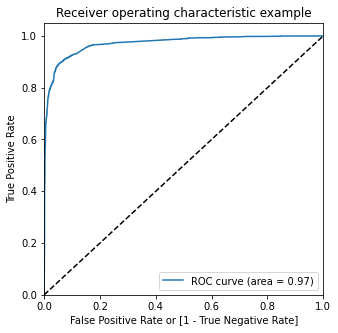

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since we have higher (0.97) area under the ROC curve , therefore model is good

#### Optimal Cutoff Point

In [161]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.173597,3052,0,1,1,0,0,0,0,0,0,0,0
1,1,0.963659,8271,1,1,1,1,1,1,1,1,1,1,1
2,0,0.064731,2780,0,1,0,0,0,0,0,0,0,0,0
3,1,0.938444,5683,1,1,1,1,1,1,1,1,1,1,1
4,1,0.960888,2764,1,1,1,1,1,1,1,1,1,1,1


In [162]:
# Calculating accuracy, sensitivity and specificity for various cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376561  1.000000  0.000000
0.1   0.1  0.855908  0.968112  0.788136
0.2   0.2  0.906980  0.928997  0.893683
0.3   0.3  0.920749  0.910289  0.927067
0.4   0.4  0.925712  0.893282  0.945300
0.5   0.5  0.926673  0.877126  0.956600
0.6   0.6  0.924111  0.860969  0.962250
0.7   0.7  0.912264  0.810374  0.973806
0.8   0.8  0.906980  0.781463  0.982794
0.9   0.9  0.883926  0.708333  0.989985


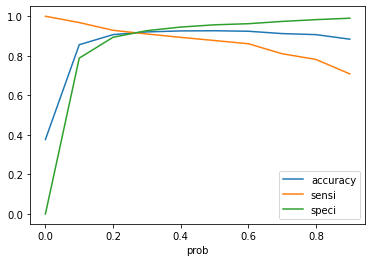

In [163]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.173597,3052,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.963659,8271,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.064731,2780,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.938444,5683,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.960888,2764,1,1,1,1,1,1,1,1,1,1,1,1


In [165]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.173597,3052,0,1,1,0,0,0,0,0,0,0,0,0,17
1,1,0.963659,8271,1,1,1,1,1,1,1,1,1,1,1,1,96
2,0,0.064731,2780,0,1,0,0,0,0,0,0,0,0,0,0,6
3,1,0.938444,5683,1,1,1,1,1,1,1,1,1,1,1,1,94
4,1,0.960888,2764,1,1,1,1,1,1,1,1,1,1,1,1,96


#### Model Evaluation

In [166]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.9138648735190522


In [167]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3550,  344],
       [ 194, 2158]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Metrics of the model
print("Sensitivity : ",TP / float(TP+FN))

print("Specificity :",TN / float(TN+FP))

print("False Positive rate : ",FP/ float(TN+FP))

print("Positive Predictive Value :",TP / float(TP+FP))

print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.9175170068027211
Specificity : 0.9116589625064201
False Positive rate :  0.08834103749357987
Positive Predictive Value : 0.8625099920063949
Negative Predictive Value :  0.9481837606837606


#### Precision and Recall

In [169]:
from sklearn.metrics import precision_score, recall_score

In [170]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3550,  344],
       [ 194, 2158]], dtype=int64)

In [171]:
# Precision
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

Precision : 0.8625099920063949


In [172]:
# Recall
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.877125850340136


#### Precision and recall tradeoff

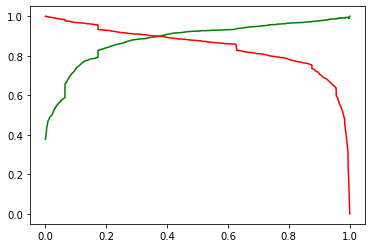

In [173]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predictions on the test set

#### Scaling the test data

In [174]:
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [175]:
col1

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Welingak Website', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [176]:
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9046,1.607200,1,0,1,0,0,0,0,0,0,0,1
8467,-0.872544,0,0,1,0,0,0,0,0,0,0,0
2435,-0.712263,1,0,0,0,0,0,1,0,0,0,0
3568,-0.443286,1,0,0,0,0,0,0,0,1,0,0
8175,0.569982,0,0,1,0,0,0,0,0,0,0,0


In [177]:
X_test_sm = sm.add_constant(X_test)

# Predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred

9046    0.986839
8467    0.173597
2435    0.003212
3568    0.002324
8175    0.448128
          ...   
7126    0.992132
5905    0.054049
8512    0.007998
5303    0.007713
5402    0.007998
Length: 2678, dtype: float64

In [178]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
9046,0.986839
8467,0.173597
2435,0.003212
3568,0.002324
8175,0.448128


In [179]:
y_test_df = pd.DataFrame(y_test)

# Adding Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,9046,0.986839
1,0,8467,0.173597
2,0,2435,0.003212
3,0,3568,0.002324
4,1,8175,0.448128


In [181]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,9046,0.986839,1
1,0,8467,0.173597,0
2,0,2435,0.003212,0
3,0,3568,0.002324,0
4,1,8175,0.448128,1


#### Evaluation on Test dataset

In [182]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

Accuracy : 0.9241971620612397


array([[1528,  133],
       [  70,  947]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Metrics of the model
print("Sensitivity : ",TP / float(TP+FN))

print("Specificity :",TN / float(TN+FP))

print("False Positive rate : ",FP/ float(TN+FP))

print("Positive Predictive Value :",TP / float(TP+FP))

print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.9311701081612586
Specificity : 0.9199277543648404
False Positive rate :  0.08007224563515954
Positive Predictive Value : 0.8768518518518519
Negative Predictive Value :  0.9561952440550688


#### Assigning Lead Score to the Test data

In [184]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,1,9046,0.986839,1,99
1,0,8467,0.173597,0,17
2,0,2435,0.003212,0,0
3,0,3568,0.002324,0,0
4,1,8175,0.448128,1,45


#### Inferences on Test Data:
    - Accuracy: 92%
    - Sensitivity - 93%
    - Specificity - 91%

#### Model results evaluation between Train and Test data:
Train Data:
    - Accuracy: 91%
    - Sensitivity - 92%
    - Specificity - 91%
    
Test Data:
    - Accuracy: 92%
    - Sensitivity - 93%
    - Specificity - 91%

#### Inference:
Target lead conversion rate is higher than the ball park of 80% shared by CEO, hence the Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 91%.

#### Dataset of high potential leads that is to be shared with business
Lead score > 91% are considered to be Hot Leads

In [185]:
hot_leads = y_pred_final.loc[y_pred_final["Lead_Score"]>=91]
hot_leads

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,1,9046,0.986839,1,99
5,1,7753,0.995531,1,100
6,1,1899,0.999275,1,100
10,1,5975,0.973731,1,97
14,1,3147,0.998769,1,100
...,...,...,...,...,...
2659,1,8056,0.994155,1,99
2668,1,2571,0.960607,1,96
2671,0,8921,0.948207,1,95
2672,1,7346,0.998865,1,100


#### Download the final list of leads to a csv file for showcasing it to business

In [187]:
hot_leads.to_csv("potential_leads.csv")

#### Inference:
    - There are 761 leads which can be contacted and have a high chance of getting converted.

In [186]:
# Important Features from final model
result.params.sort_values(ascending=False)

Tags_Closed by Horizzon                     6.747278
Tags_Lost to EINS                           5.872022
Lead Source_Welingak Website                4.849027
Tags_Will revert after reading the email    4.620572
Last Notable Activity_SMS Sent              3.186244
Last Notable Activity_Email Opened          1.110243
Total Time Spent on Website                 0.937322
Tags_Busy                                   0.898068
Lead Origin_Landing Page Submission        -1.067265
const                                      -1.852737
Tags_Interested in other courses           -2.149995
Tags_Other_Tags                            -2.726850
Tags_Ringing                               -3.421185
dtype: float64

#### Recommendations:
- The company should make calls to the leads associate to the tags ["Closed by Horizzon", "Lost to EINS", "Will revert after reading the email"] as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources ["Welingak Websites"] as these are more likely to get converted.
- The company should make calls to the leads who spent ["more time on the websites"] as these are more likely to get converted.
- The company should make calls to the leads whose last activity was ["SMS Sent", "Email Opened"] as they are more likely to get converted.
- The company should not make calls to the leads whose lead origin is ["Landing Page Submission"] as they are not likely to get converted.
- The company should make calls to the leads associate to the tags ["Interested in other courses", "Other_Tags", "Ringing"] as these are not likely to get converted.